# Find 2 overlapping tiles and convert them 

## d_prototype_hls_stac_find_least_cloudy_zone18_tile

In [1]:
#unpickle the geodataframe

In [2]:
import pickle
gdf = pickle.load( open( "overlapping_tiles.pickle", "rb" ) )
gdf

,Name,Description,geometry
16984,18TYR,TILE PROPERTIES<br><table border=0 cellpadding...,GEOMETRYCOLLECTION Z (POLYGON Z ((-72.41645 46...
17893,19TCL,TILE PROPERTIES<br><table border=0 cellpadding...,GEOMETRYCOLLECTION Z (POLYGON Z ((-71.58407 46...


# Search HLS1.5 for images

# Authentication stuff I borrowed from others - Logan, Cole ...

In [3]:
import sys  
sys.path.insert(0, '.')
from hls_functions import urs_authenticate
from hls_functions import simple_hls_stac_search

In [4]:
urs_authenticate()

# ok get a tile now from october 

In [5]:
gdf

,Name,Description,geometry
16984,18TYR,TILE PROPERTIES<br><table border=0 cellpadding...,GEOMETRYCOLLECTION Z (POLYGON Z ((-72.41645 46...
17893,19TCL,TILE PROPERTIES<br><table border=0 cellpadding...,GEOMETRYCOLLECTION Z (POLYGON Z ((-71.58407 46...


In [6]:
gdf.reset_index(inplace=True, drop=True)

In [7]:
gdf

,Name,Description,geometry
0,18TYR,TILE PROPERTIES<br><table border=0 cellpadding...,GEOMETRYCOLLECTION Z (POLYGON Z ((-72.41645 46...
1,19TCL,TILE PROPERTIES<br><table border=0 cellpadding...,GEOMETRYCOLLECTION Z (POLYGON Z ((-71.58407 46...


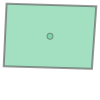

In [8]:
gdf['geometry'][0]

# test search by bounds

In [9]:
gdf['geometry'][0].bounds

(-72.4612931365, 44.9975876117, -71.0006794401, 46.0243650752)

In [10]:
bounds = gdf['geometry'][0].bounds

In [11]:
bbox = f'{bounds[0]},{bounds[1]},{bounds[2]},{bounds[3]}'  # Defined from ROI bounds

# Refine by date october 2020 - less cloudy perhaps?

In [12]:
#search_response
date_time = "2020-10-01T00:00:00Z/2020-10-31T23:31:12Z"
my_hls_items= simple_hls_stac_search(bbox, date_time)

56 items found!


In [13]:
my_fav_tile = gdf['Name'][0]
my_fav_tile

'18TYR'

# cool metadata is here 
https://cmr.earthdata.nasa.gov/search/concepts/G1969487860-LPCLOUD.umm_json

https://lpdaac.earthdata.nasa.gov/lp-prod-public/HLSS30.015/HLS.S30.T18TYR.2020283T154059.v1.5.jpg

In [14]:
target_url = my_hls_items[1]['links'][-1]['href']

In [15]:
#import urllib
import json

import urllib.request, json 
with urllib.request.urlopen(target_url) as url:
    my_meta = json.loads(url.read().decode())

In [16]:
my_meta

{'RelatedUrls': [{'URL': 'https://lpdaac.earthdata.nasa.gov/lp-prod-protected/HLSS30.015/HLS.S30.T18TYS.2020278T154121.v1.5.B04.tif',
   'Type': 'GET DATA',
   'Description': 'Download HLS.S30.T18TYS.2020278T154121.v1.5.B04.tif'},
  {'URL': 'https://lpdaac.earthdata.nasa.gov/lp-prod-protected/HLSS30.015/HLS.S30.T18TYS.2020278T154121.v1.5.B08.tif',
   'Type': 'GET DATA',
   'Description': 'Download HLS.S30.T18TYS.2020278T154121.v1.5.B08.tif'},
  {'URL': 'https://lpdaac.earthdata.nasa.gov/lp-prod-protected/HLSS30.015/HLS.S30.T18TYS.2020278T154121.v1.5.B06.tif',
   'Type': 'GET DATA',
   'Description': 'Download HLS.S30.T18TYS.2020278T154121.v1.5.B06.tif'},
  {'URL': 'https://lpdaac.earthdata.nasa.gov/lp-prod-protected/HLSS30.015/HLS.S30.T18TYS.2020278T154121.v1.5.B05.tif',
   'Type': 'GET DATA',
   'Description': 'Download HLS.S30.T18TYS.2020278T154121.v1.5.B05.tif'},
  {'URL': 'https://lpdaac.earthdata.nasa.gov/lp-prod-protected/HLSS30.015/HLS.S30.T18TYS.2020278T154121.v1.5.VZA.tif',
  

In [17]:
#search_response

In [18]:
import pandas as pd
df = pd.DataFrame(my_meta['AdditionalAttributes'])

In [19]:
df

,Name,Values
0,PRODUCT_URI,[S2A_MSIL1C_20201004T154121_N0209_R011_T18TYS_...
1,CLOUD_COVERAGE,[47]
2,MGRS_TILE_ID,[18TYS]
3,SPATIAL_COVERAGE,[99]
4,SPATIAL_RESOLUTION,[30]
5,HLS_PROCESSING_TIME,[2020-10-07T23:23:17Z]
6,SENSING_TIME,[2020-10-04T15:50:22.934073Z]
7,HORIZONTAL_CS_CODE,[EPSG:32618]
8,HORIZONTAL_CS_NAME,[WGS84 / UTM zone 18N]
9,ULX,[699960.0]


In [20]:
#df['Name']['SPATIAL_COVERAGE']

df.loc[df['Name'] == 'SPATIAL_COVERAGE']

,Name,Values
3,SPATIAL_COVERAGE,[99]


In [21]:
df.loc[df['Name'] == 'CLOUD_COVERAGE']

,Name,Values
1,CLOUD_COVERAGE,[47]


In [22]:
from IPython.display import Image

#Image(browse_jpg)

In [23]:
def return_meta_dict(target_url):
    the_dict={}
    with urllib.request.urlopen(target_url) as url:
        my_meta = json.loads(url.read().decode())
        i=0
        for (name,values) in my_meta['AdditionalAttributes']:
            aname = my_meta['AdditionalAttributes'][i][name]
            avalues = my_meta['AdditionalAttributes'][i][values]
            #print(aname, avalues)
            the_dict[aname] = avalues[0]
            i=i+1
        #df = pd.DataFrame(my_meta['AdditionalAttributes'])
        #print(df)
        the_dict['META_FILE'] = target_url.split('/')[-1]
        return(the_dict)

In [24]:
def return_interesting_stuff(my_hls_items):
    meta_list=[]
    for item in my_hls_items:
        #print(item)
        target_url = item['links'][-1]['href']
        #print(target_url)
        meta_dict = return_meta_dict(target_url)
       # print(meta_dict)
        meta_list.append(meta_dict)
        
    df = pd.DataFrame(meta_list)
    return(df)


In [25]:
interesting_df = return_interesting_stuff(my_hls_items)

In [26]:
interesting_df

,PRODUCT_URI,CLOUD_COVERAGE,MGRS_TILE_ID,SPATIAL_COVERAGE,SPATIAL_RESOLUTION,HLS_PROCESSING_TIME,SENSING_TIME,HORIZONTAL_CS_CODE,HORIZONTAL_CS_NAME,ULX,...,AROP_AVE_XSHIFT(METERS),AROP_AVE_YSHIFT(METERS),AROP_NCP,AROP_RMSE(METERS),AROP_S2_REFIMG,ACCODE,PROCESSING_BASELINE,IDENTIFIER_PRODUCT_DOI,IDENTIFIER_PRODUCT_DOI_AUTHORITY,META_FILE
0,S2A_MSIL1C_20201004T154121_N0209_R011_T19TCM_2...,69,19TCM,99,30,2020-10-07T23:28:50Z,2020-10-04T15:50:20.172057Z,EPSG:32619,WGS84 / UTM zone 19N,300000.0,...,0.0,0.0,0,0.0,NONE,LaSRC,02.09,10.5067/HLS/HLSS30.015,https://doi.org,G1950230531-LPCLOUD.umm_json
1,S2A_MSIL1C_20201004T154121_N0209_R011_T18TYS_2...,47,18TYS,99,30,2020-10-07T23:23:17Z,2020-10-04T15:50:22.934073Z,EPSG:32618,WGS84 / UTM zone 18N,699960.0,...,0.0,0.0,0,0.0,NONE,LaSRC,02.09,10.5067/HLS/HLSS30.015,https://doi.org,G1950229063-LPCLOUD.umm_json
2,S2A_MSIL1C_20201004T154121_N0209_R011_T18TXS_2...,55,18TXS,48,30,2020-10-07T23:00:58Z,2020-10-04T15:50:25.68684Z,EPSG:32618,WGS84 / UTM zone 18N,600000.0,...,0.0,0.0,0,0.0,NONE,LaSRC,02.09,10.5067/HLS/HLSS30.015,https://doi.org,G1950224566-LPCLOUD.umm_json
3,S2A_MSIL1C_20201004T154121_N0209_R011_T19TCL_2...,97,19TCL,99,30,2020-10-07T23:24:31Z,2020-10-04T15:50:34.350916Z,EPSG:32619,WGS84 / UTM zone 19N,300000.0,...,0.0,0.0,0,0.0,NONE,LaSRC,02.09,10.5067/HLS/HLSS30.015,https://doi.org,G1950229117-LPCLOUD.umm_json
4,S2A_MSIL1C_20201004T154121_N0209_R011_T18TYR_2...,82,18TYR,99,30,2020-10-07T23:28:04Z,2020-10-04T15:50:37.622923Z,EPSG:32618,WGS84 / UTM zone 18N,699960.0,...,0.0,0.0,0,0.0,NONE,LaSRC,02.09,10.5067/HLS/HLSS30.015,https://doi.org,G1950229328-LPCLOUD.umm_json
5,S2A_MSIL1C_20201004T154121_N0209_R011_T18TXR_2...,72,18TXR,68,30,2020-10-07T23:23:17Z,2020-10-04T15:50:40.629451Z,EPSG:32618,WGS84 / UTM zone 18N,600000.0,...,0.0,0.0,0,0.0,NONE,LaSRC,02.09,10.5067/HLS/HLSS30.015,https://doi.org,G1950228822-LPCLOUD.umm_json
6,S2A_MSIL1C_20201004T154121_N0209_R011_T19TCK_2...,78,19TCK,99,30,2020-10-07T23:24:33Z,2020-10-04T15:50:48.624173Z,EPSG:32619,WGS84 / UTM zone 19N,300000.0,...,0.0,0.0,0,0.0,NONE,LaSRC,02.09,10.5067/HLS/HLSS30.015,https://doi.org,G1950229110-LPCLOUD.umm_json
7,S2A_MSIL1C_20201004T154121_N0209_R011_T18TYQ_2...,91,18TYQ,99,30,2020-10-07T23:34:39Z,2020-10-04T15:50:52.079049Z,EPSG:32618,WGS84 / UTM zone 18N,699960.0,...,0.0,0.0,0,0.0,NONE,LaSRC,02.09,10.5067/HLS/HLSS30.015,https://doi.org,G1950231842-LPCLOUD.umm_json
8,S2A_MSIL1C_20201004T154121_N0209_R011_T18TXQ_2...,97,18TXQ,88,30,2020-10-07T23:20:31Z,2020-10-04T15:50:55.332064Z,EPSG:32618,WGS84 / UTM zone 18N,600000.0,...,0.0,0.0,0,0.0,NONE,LaSRC,02.09,10.5067/HLS/HLSS30.015,https://doi.org,G1950228507-LPCLOUD.umm_json
9,S2B_MSIL1C_20201009T154059_N0209_R011_T19TCM_2...,49,19TCM,99,30,2020-10-11T13:15:39Z,2020-10-09T15:50:18.045438Z,EPSG:32619,WGS84 / UTM zone 19N,300000.0,...,0.0,0.0,0,0.0,NONE,LaSRC,02.09,10.5067/HLS/HLSS30.015,https://doi.org,G1951504225-LPCLOUD.umm_json


In [27]:
# tony_df = interesting_df[['PRODUCT_URI','CLOUD_COVERAGE','MGRS_TILE_ID','SPATIAL_COVERAGE']]
tony_df = interesting_df[['CLOUD_COVERAGE','MGRS_TILE_ID','SPATIAL_COVERAGE','META_FILE']]


In [28]:
tony_df

,CLOUD_COVERAGE,MGRS_TILE_ID,SPATIAL_COVERAGE,META_FILE
0,69,19TCM,99,G1950230531-LPCLOUD.umm_json
1,47,18TYS,99,G1950229063-LPCLOUD.umm_json
2,55,18TXS,48,G1950224566-LPCLOUD.umm_json
3,97,19TCL,99,G1950229117-LPCLOUD.umm_json
4,82,18TYR,99,G1950229328-LPCLOUD.umm_json
5,72,18TXR,68,G1950228822-LPCLOUD.umm_json
6,78,19TCK,99,G1950229110-LPCLOUD.umm_json
7,91,18TYQ,99,G1950231842-LPCLOUD.umm_json
8,97,18TXQ,88,G1950228507-LPCLOUD.umm_json
9,49,19TCM,99,G1951504225-LPCLOUD.umm_json


In [29]:
sel_df = tony_df[(tony_df['MGRS_TILE_ID'] == '18TYR') & (tony_df['SPATIAL_COVERAGE'] == '99')]

In [30]:
my_hls_items

[{'type': 'Feature',
  'id': 'G1950230531-LPCLOUD',
  'stac_version': '1.0.0-beta.1',
  'stac_extensions': ['eo'],
  'collection': 'C1711924822-LPCLOUD',
  'geometry': {'type': 'Polygon',
   'coordinates': [[[-71.5799749, 45.9364192],
     [-70.1640445, 45.9596225],
     [-70.1852896, 46.9475737],
     [-71.6270102, 46.923561],
     [-71.5799749, 45.9364192]]]},
  'bbox': [-71.62701, 45.936419, -70.164045, 46.947574],
  'links': [{'rel': 'self',
    'href': 'https://cmr.earthdata.nasa.gov/stac/LPCLOUD/collections/C1711924822-LPCLOUD/items/G1950230531-LPCLOUD'},
   {'rel': 'parent',
    'href': 'https://cmr.earthdata.nasa.gov/stac/LPCLOUD/collections/C1711924822-LPCLOUD'},
   {'rel': 'collection',
    'href': 'https://cmr.earthdata.nasa.gov/stac/LPCLOUD/collections/C1711924822-LPCLOUD'},
   {'rel': 'root', 'href': 'https://cmr.earthdata.nasa.gov/stac/'},
   {'rel': 'provider', 'href': 'https://cmr.earthdata.nasa.gov/stac/LPCLOUD'},
   {'rel': 'via',
    'href': 'https://cmr.earthdata.na

In [31]:
for item in my_hls_items:
    print(item['id'])

G1950230531-LPCLOUD
G1950229063-LPCLOUD
G1950224566-LPCLOUD
G1950229117-LPCLOUD
G1950229328-LPCLOUD
G1950228822-LPCLOUD
G1950229110-LPCLOUD
G1950231842-LPCLOUD
G1950228507-LPCLOUD
G1951504225-LPCLOUD
G1951508879-LPCLOUD
G1951506669-LPCLOUD
G1951559577-LPCLOUD
G1951510836-LPCLOUD
G1951510207-LPCLOUD
G1951574291-LPCLOUD
G1951504867-LPCLOUD
G1951506679-LPCLOUD
G1952755180-LPCLOUD
G1952757586-LPCLOUD
G1952758828-LPCLOUD
G1952755521-LPCLOUD
G1952759059-LPCLOUD
G1952767572-LPCLOUD
G1953535530-LPCLOUD
G1953495074-LPCLOUD
G1953499810-LPCLOUD
G1953496892-LPCLOUD
G1953486440-LPCLOUD
G1953483832-LPCLOUD
G1953512914-LPCLOUD
G1953522487-LPCLOUD
G1953510598-LPCLOUD
G1955365017-LPCLOUD
G1955374158-LPCLOUD
G1955380643-LPCLOUD
G1955353295-LPCLOUD
G1955361337-LPCLOUD
G1957578433-LPCLOUD
G1957578910-LPCLOUD
G1957587344-LPCLOUD
G1958155968-LPCLOUD
G1958131673-LPCLOUD
G1958099348-LPCLOUD
G1958137921-LPCLOUD
G1958131585-LPCLOUD
G1958132423-LPCLOUD
G1959594916-LPCLOUD
G1959553248-LPCLOUD
G1959567155-LPCLOUD


In [32]:
item_df = pd.DataFrame(my_hls_items)

In [33]:
item_df

,type,id,stac_version,stac_extensions,collection,geometry,bbox,links,properties,assets
0,Feature,G1950230531-LPCLOUD,1.0.0-beta.1,[eo],C1711924822-LPCLOUD,"{'type': 'Polygon', 'coordinates': [[[-71.5799...","[-71.62701, 45.936419, -70.164045, 46.947574]","[{'rel': 'self', 'href': 'https://cmr.earthdat...","{'datetime': '2020-10-04T15:50:20.172Z', 'star...",{'B8A': {'name': 'Download HLS.S30.T19TCM.2020...
1,Feature,G1950229063-LPCLOUD,1.0.0-beta.1,[eo],C1711924822-LPCLOUD,"{'type': 'Polygon', 'coordinates': [[[-71.0069...","[-72.420541, 45.895735, -70.934343, 46.923573]","[{'rel': 'self', 'href': 'https://cmr.earthdat...","{'datetime': '2020-10-04T15:50:22.934Z', 'star...",{'B04': {'name': 'Download HLS.S30.T18TYS.2020...
2,Feature,G1950224566-LPCLOUD,1.0.0-beta.1,[eo],C1711924822-LPCLOUD,"{'type': 'Polygon', 'coordinates': [[[-72.2937...","[-73.1368, 45.933497, -72.244415, 46.932361]","[{'rel': 'self', 'href': 'https://cmr.earthdat...","{'datetime': '2020-10-04T15:50:25.686Z', 'star...",{'SZA': {'name': 'Download HLS.S30.T18TXS.2020...
3,Feature,G1950229117-LPCLOUD,1.0.0-beta.1,[eo],C1711924822-LPCLOUD,"{'type': 'Polygon', 'coordinates': [[[-71.5392...","[-71.584065, 45.037023, -70.145634, 46.047628]","[{'rel': 'self', 'href': 'https://cmr.earthdat...","{'datetime': '2020-10-04T15:50:34.350Z', 'star...",{'B07': {'name': 'Download HLS.S30.T19TCL.2020...
4,Feature,G1950229328-LPCLOUD,1.0.0-beta.1,[eo],C1711924822-LPCLOUD,"{'type': 'Polygon', 'coordinates': [[[-71.0699...","[-72.461293, 44.997588, -71.000679, 46.024365]","[{'rel': 'self', 'href': 'https://cmr.earthdat...","{'datetime': '2020-10-04T15:50:37.622Z', 'star...",{'Fmask': {'name': 'Download HLS.S30.T18TYR.20...
5,Feature,G1950228822-LPCLOUD,1.0.0-beta.1,[eo],C1711924822-LPCLOUD,"{'type': 'Polygon', 'coordinates': [[[-72.3364...","[-73.444253, 45.03419, -72.289456, 46.037891]","[{'rel': 'self', 'href': 'https://cmr.earthdat...","{'datetime': '2020-10-04T15:50:40.629Z', 'star...",{'B10': {'name': 'Download HLS.S30.T18TXR.2020...
6,Feature,G1950229110-LPCLOUD,1.0.0-beta.1,[eo],C1711924822-LPCLOUD,"{'type': 'Polygon', 'coordinates': [[[-71.5003...","[-71.543139, 44.137997, -70.128081, 45.148073]","[{'rel': 'self', 'href': 'https://cmr.earthdat...","{'datetime': '2020-10-04T15:50:48.624Z', 'star...",{'B10': {'name': 'Download HLS.S30.T19TCK.2020...
7,Feature,G1950231842-LPCLOUD,1.0.0-beta.1,[eo],C1711924822-LPCLOUD,"{'type': 'Polygon', 'coordinates': [[[-71.1300...","[-72.500151, 44.099771, -71.063902, 45.125525]","[{'rel': 'self', 'href': 'https://cmr.earthdat...","{'datetime': '2020-10-04T15:50:52.079Z', 'star...",{'B12': {'name': 'Download HLS.S30.T18TYQ.2020...
8,Feature,G1950228507-LPCLOUD,1.0.0-beta.1,[eo],C1711924822-LPCLOUD,"{'type': 'Polygon', 'coordinates': [[[-72.3772...","[-73.743381, 44.135251, -72.332379, 45.142829]","[{'rel': 'self', 'href': 'https://cmr.earthdat...","{'datetime': '2020-10-04T15:50:55.332Z', 'star...",{'B01': {'name': 'Download HLS.S30.T18TXQ.2020...
9,Feature,G1951504225-LPCLOUD,1.0.0-beta.1,[eo],C1711924822-LPCLOUD,"{'type': 'Polygon', 'coordinates': [[[-71.5799...","[-71.62701, 45.936419, -70.164045, 46.947574]","[{'rel': 'self', 'href': 'https://cmr.earthdat...","{'datetime': '2020-10-09T15:50:18.045Z', 'star...",{'VZA': {'name': 'Download HLS.S30.T19TCM.2020...


In [34]:
def return_id_from_meta_file(meta_file):
    file = meta_file.split('/')[-1]
    id = file.split('.')[-2]
    print (file,id)
    return(id)

In [35]:
# target_id = return_id_from_meta_file(my_target_id)

In [36]:
# my_best_item = item_df[item_df['id'] == target_id]

In [37]:
# target_id

In [38]:
#my_best_item

In [39]:
# assets = dict(my_best_item['assets'])

In [40]:
# assets

In [41]:
import gdal
# GDAL configurations used to successfully access LP DAAC Cloud Assets via vsicurl 
gdal.SetConfigOption("GDAL_HTTP_UNSAFESSL", "YES")
gdal.SetConfigOption('GDAL_HTTP_COOKIEFILE','~/cookies.txt')
gdal.SetConfigOption('GDAL_HTTP_COOKIEJAR', '~/cookies.txt')
gdal.SetConfigOption('GDAL_DISABLE_READDIR_ON_OPEN','YES')
gdal.SetConfigOption('CPL_VSIL_CURL_ALLOWED_EXTENSIONS','TIF')

In [42]:
# This belongs in xr_simple_xarray.py

In [43]:
import xarray as xr
import rioxarray as rxr
def combine_tifs(tif_list):
    """A function that combines a list of tifs in the same CRS
    and of the same extent into an xarray object

    Parameters
    ----------
    tif_list : list
        A list of paths to the tif files that you wish to combine.
        
    Returns
    -------
    An xarray object with all of the tif files in the listmerged into 
    a single object.

    """

    out_xr=[]
    for i, tif_path in enumerate(tif_list):
        out_xr.append(rxr.open_rasterio(tif_path, masked=True).squeeze())
        out_xr[i]["band"]=i+1
     
    return xr.concat(out_xr, dim="band") 

In [44]:
sel_df

,CLOUD_COVERAGE,MGRS_TILE_ID,SPATIAL_COVERAGE,META_FILE
4,82,18TYR,99,G1950229328-LPCLOUD.umm_json
13,23,18TYR,99,G1951510836-LPCLOUD.umm_json
28,62,18TYR,99,G1953486440-LPCLOUD.umm_json
44,98,18TYR,99,G1958137921-LPCLOUD.umm_json


In [45]:
def return_browse_url_from_id(id, item_df):
    print(id)
    my_best_item = item_df[item_df['id'] == id]
    assets = dict(my_best_item['assets'].values[0])
    browse_url = assets['browse']['href']
    return(browse_url)
    
    #print(assets)

In [46]:
def display_browse(meta_file):
    print(meta_file)
    id = return_id_from_meta_file(meta_file)
    print(id)
    item_df = pd.DataFrame(my_hls_items)
    br = return_browse_url_from_id(id, item_df)
    print("BROWSE",br)
    display(Image(br))

In [47]:
# for (i,row) in sel_df.iterrows():
#     mf = row['META_FILE']
#     display_browse(mf)

In [48]:
#item_df

In [49]:
sel_df

,CLOUD_COVERAGE,MGRS_TILE_ID,SPATIAL_COVERAGE,META_FILE
4,82,18TYR,99,G1950229328-LPCLOUD.umm_json
13,23,18TYR,99,G1951510836-LPCLOUD.umm_json
28,62,18TYR,99,G1953486440-LPCLOUD.umm_json
44,98,18TYR,99,G1958137921-LPCLOUD.umm_json


In [50]:
cloud_df = sel_df.sort_values(['CLOUD_COVERAGE'], ascending=True)

In [51]:
cloud_df

,CLOUD_COVERAGE,MGRS_TILE_ID,SPATIAL_COVERAGE,META_FILE
13,23,18TYR,99,G1951510836-LPCLOUD.umm_json
28,62,18TYR,99,G1953486440-LPCLOUD.umm_json
4,82,18TYR,99,G1950229328-LPCLOUD.umm_json
44,98,18TYR,99,G1958137921-LPCLOUD.umm_json


In [52]:
cloud_df.reset_index(inplace=True, drop=True)

In [53]:
cloud_df

,CLOUD_COVERAGE,MGRS_TILE_ID,SPATIAL_COVERAGE,META_FILE
0,23,18TYR,99,G1951510836-LPCLOUD.umm_json
1,62,18TYR,99,G1953486440-LPCLOUD.umm_json
2,82,18TYR,99,G1950229328-LPCLOUD.umm_json
3,98,18TYR,99,G1958137921-LPCLOUD.umm_json


G1951510836-LPCLOUD.umm_json
G1951510836-LPCLOUD.umm_json G1951510836-LPCLOUD
G1951510836-LPCLOUD
G1951510836-LPCLOUD
BROWSE https://lpdaac.earthdata.nasa.gov/lp-prod-public/HLSS30.015/HLS.S30.T18TYR.2020283T154059.v1.5.jpg


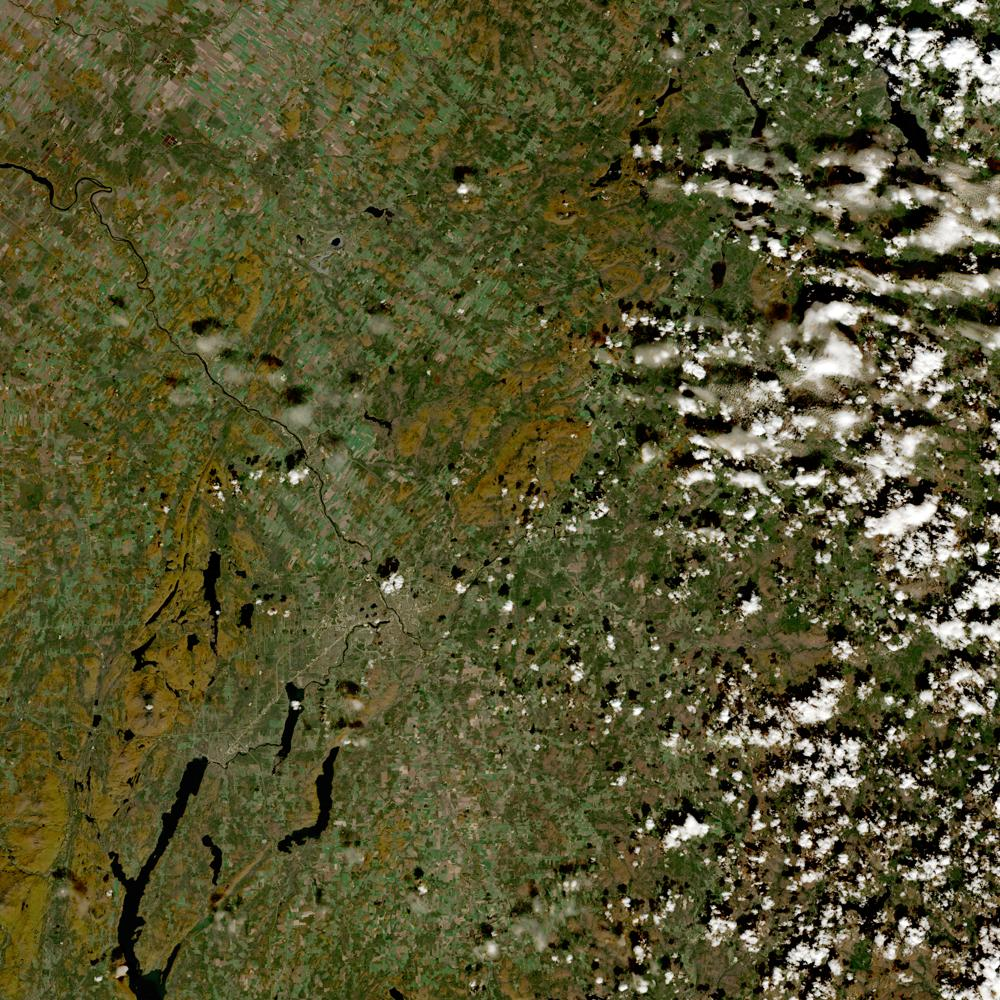

G1953486440-LPCLOUD.umm_json
G1953486440-LPCLOUD.umm_json G1953486440-LPCLOUD
G1953486440-LPCLOUD
G1953486440-LPCLOUD
BROWSE https://lpdaac.earthdata.nasa.gov/lp-prod-public/HLSS30.015/HLS.S30.T18TYR.2020288T154231.v1.5.jpg


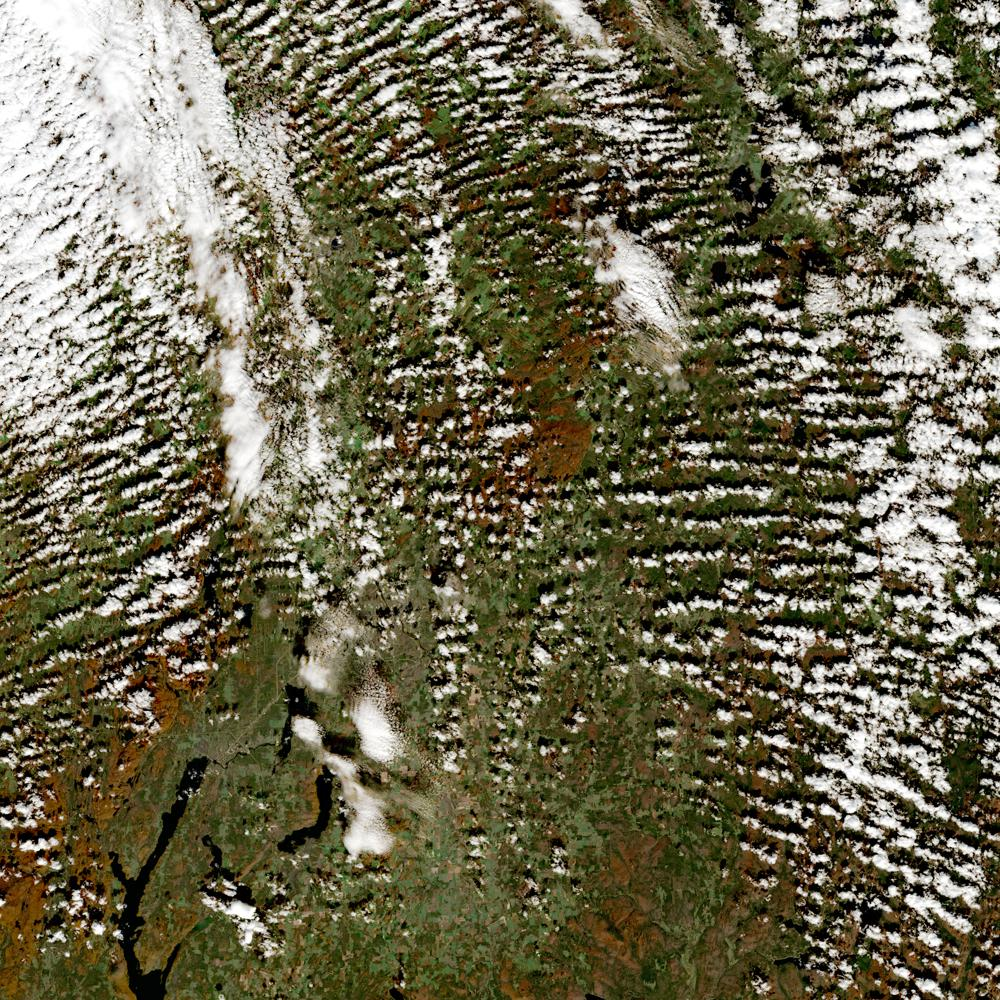

G1950229328-LPCLOUD.umm_json
G1950229328-LPCLOUD.umm_json G1950229328-LPCLOUD
G1950229328-LPCLOUD
G1950229328-LPCLOUD
BROWSE https://lpdaac.earthdata.nasa.gov/lp-prod-public/HLSS30.015/HLS.S30.T18TYR.2020278T154121.v1.5.jpg


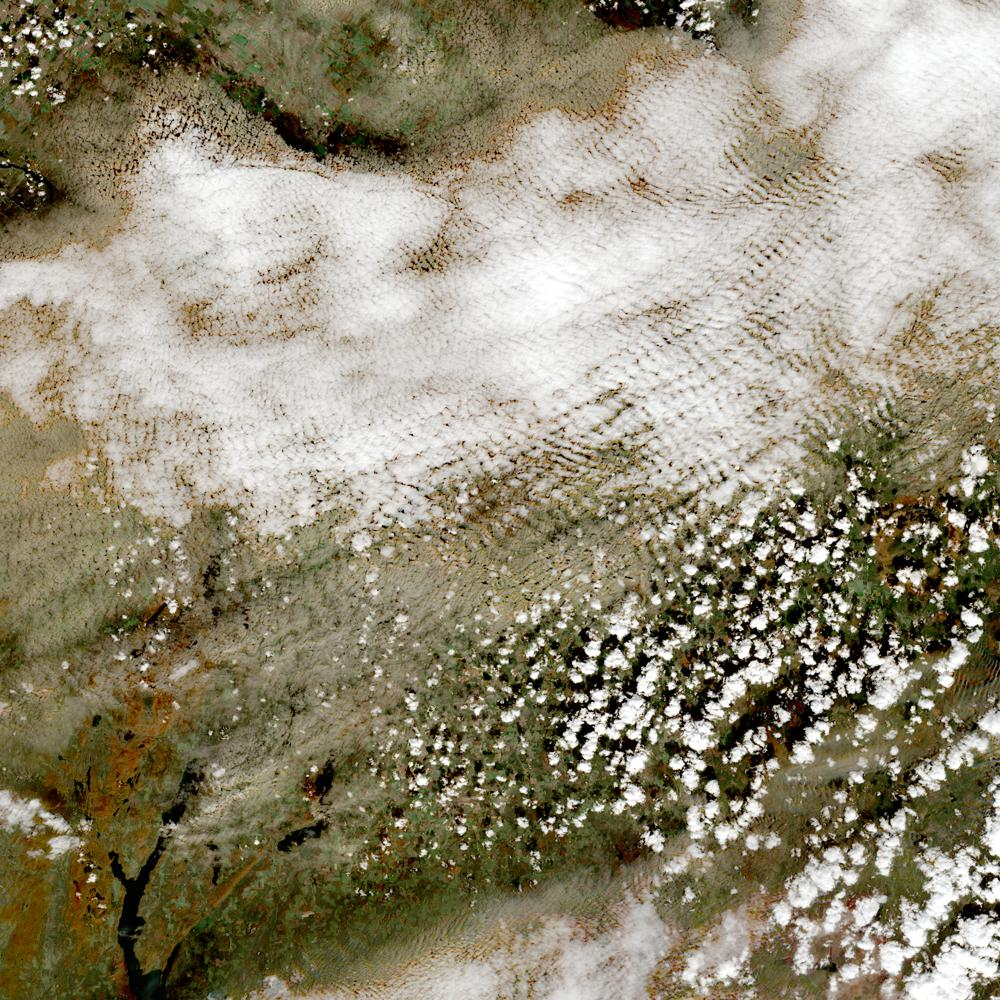

G1958137921-LPCLOUD.umm_json
G1958137921-LPCLOUD.umm_json G1958137921-LPCLOUD
G1958137921-LPCLOUD
G1958137921-LPCLOUD
BROWSE https://lpdaac.earthdata.nasa.gov/lp-prod-public/HLSS30.015/HLS.S30.T18TYR.2020298T154331.v1.5.jpg


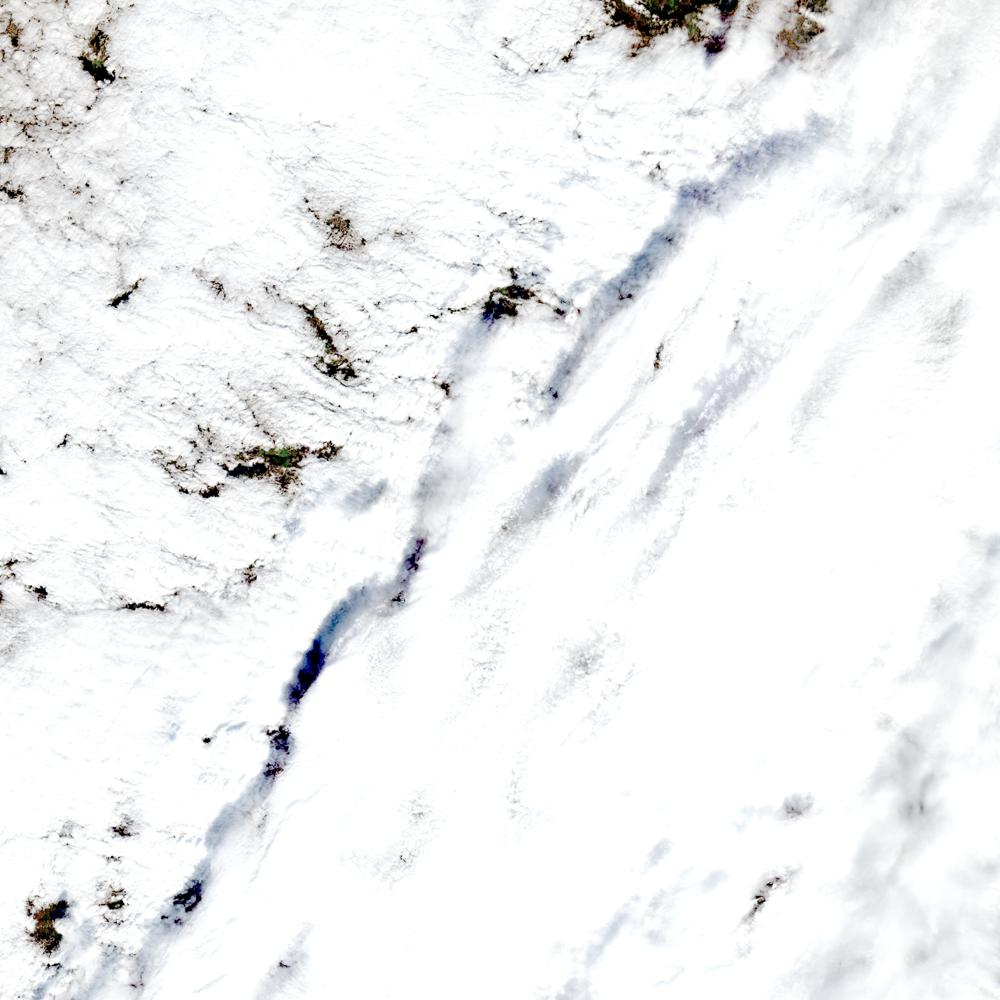

In [54]:
for (i,row) in cloud_df.iterrows():
    mf = row['META_FILE']
    display_browse(mf)

In [55]:
mf = cloud_df.iloc[0]['META_FILE']

In [56]:
mf

'G1951510836-LPCLOUD.umm_json'

In [57]:
target_id = return_id_from_meta_file(mf)

G1951510836-LPCLOUD.umm_json G1951510836-LPCLOUD


In [58]:
my_best_item = item_df[item_df['id'] == target_id]

In [59]:
assets = dict(my_best_item['assets'].values[0])

In [60]:
browse_jpg = assets['browse']['href']

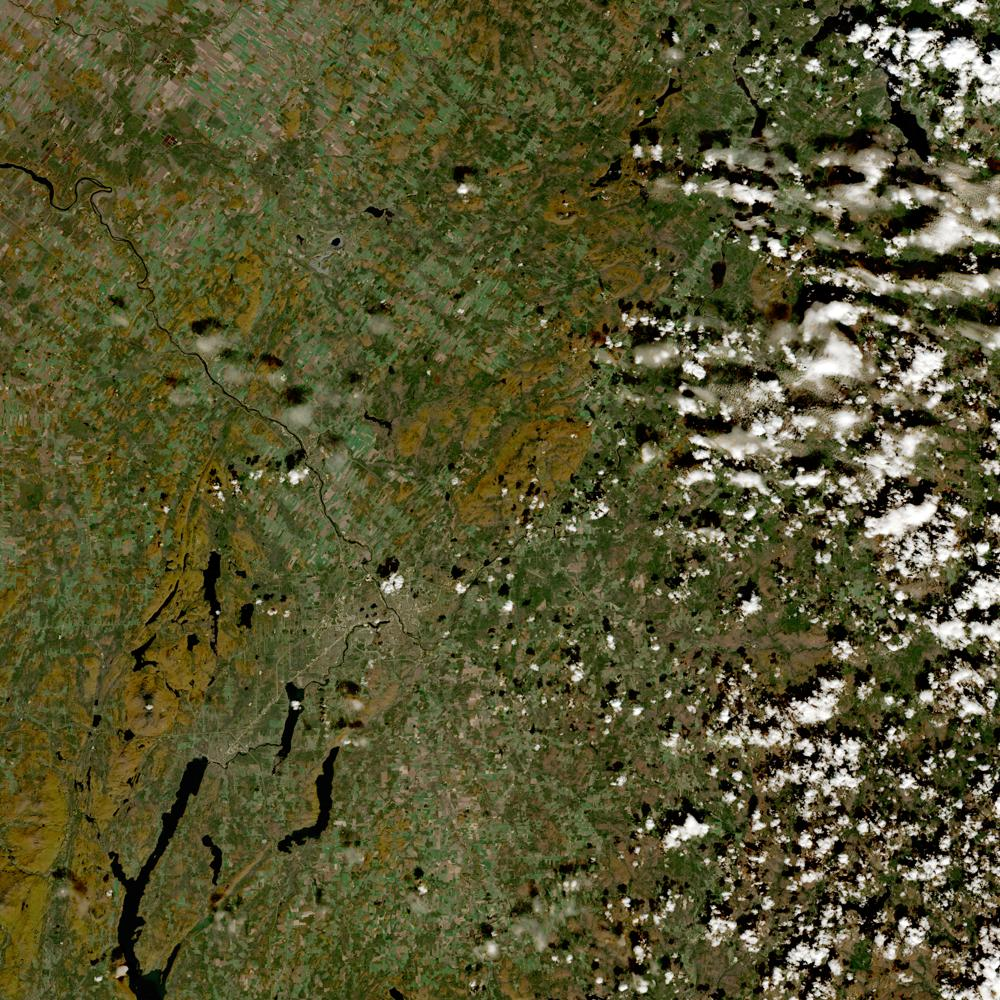

In [61]:
Image(browse_jpg)